In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

figsize = (7,5)
#efficiencyYScale = (0.955, 0.977)
fileFormat = ".pdf"

C:\Users\Daniel\AppData\Local\Temp/ipykernel_9988/2252345011.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  sensor,fracNoisy,fracMasked,fracReconstructed,nTracksTotal,nTracksReconstructed=np.genfromtxt(filename+'.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3,4,5), unpack=True,dtype=None)


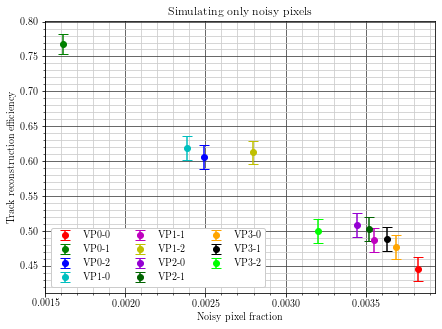

In [81]:
filename = "noisy=0minusMasked_dead=none"

sensor,fracNoisy,fracMasked,fracReconstructed,nTracksTotal,nTracksReconstructed=np.genfromtxt(filename+'.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3,4,5), unpack=True,dtype=None)
sensor=sensor.astype(str)
c=['r', 'g', 'b', 'c', 'm', 'y', 'darkviolet', 'darkgreen', 'gray', 'orange', 'black', 'lime']

#remove entries for VP2-2 which crashed
i = int(np.where(sensor=="VP2-2")[0])
sensor = np.delete(sensor, i)
fracNoisy = np.delete(fracNoisy, i)
fracMasked = np.delete(fracMasked, i)
fracReconstructed = np.delete(fracReconstructed, i)
nTracksTotal = np.delete(nTracksTotal, i)
nTracksReconstructed = np.delete(nTracksReconstructed, i)
c.pop(i)

#calculate efficiency error
nTracksReconstructed = np.sqrt(nTracksTotal*fracReconstructed*(1-fracReconstructed))
fracReconstructedError = nTracksReconstructed / nTracksTotal

fig= plt.figure(figsize=figsize)
plt.title("Simulating only noisy pixels")
plt.xlabel("Noisy pixel fraction")
plt.ylabel("Track reconstruction efficiency")
#plt.ylim(efficiencyYScale)
plt.grid(which="major", c="#444")
plt.grid(which="minor", c="#ccc")
plt.minorticks_on()
for i in range(sensor.size):
    plt.errorbar(fracNoisy[i], fracReconstructed[i], yerr=fracReconstructedError[i],  c=c[i], label=sensor[i], marker="o", capsize=5, linestyle='')

fig.legend(loc="upper center", framealpha=1, bbox_to_anchor=(0.35,0.32), ncol=3)
plt.savefig("plots/"+filename+fileFormat, bbox_inches='tight')

C:\Users\Daniel\AppData\Local\Temp/ipykernel_9988/2564898092.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  sensor,fracNoisy,fracMasked,fracReconstructed,nTracksTotal,nTracksReconstructed=np.genfromtxt(filename+'.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3,4,5), unpack=True,dtype=None)


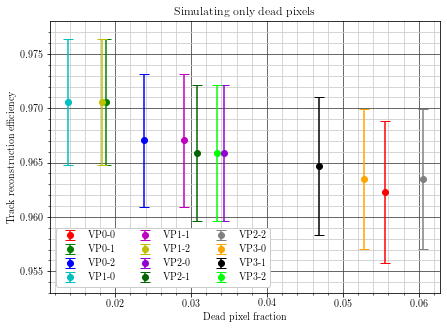

In [82]:
filename = "noisy=none_dead=DEFplusMasked"

sensor,fracNoisy,fracMasked,fracReconstructed,nTracksTotal,nTracksReconstructed=np.genfromtxt(filename+'.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3,4,5), unpack=True,dtype=None)
sensor=sensor.astype(str)
c=['r', 'g', 'b', 'c', 'm', 'y', 'darkviolet', 'darkgreen', 'gray', 'orange', 'black', 'lime']

#calculate efficiency error
nTracksReconstructed = np.sqrt(nTracksTotal*fracReconstructed*(1-fracReconstructed))
fracReconstructedError = nTracksReconstructed / nTracksTotal

fig= plt.figure(figsize=figsize)
plt.title("Simulating only dead pixels")
plt.xlabel("Dead pixel fraction")
plt.ylabel("Track reconstruction efficiency")
plt.ylim(0.953,0.978)
plt.grid(which="major", c="#444")
plt.grid(which="minor", c="#ccc")
plt.minorticks_on()
for i in range(sensor.size):
    plt.errorbar(fracMasked[i], fracReconstructed[i], yerr=fracReconstructedError[i],  c=c[i], label=sensor[i], marker="o", capsize=5, linestyle='')

fig.legend(loc="upper center", framealpha=1, bbox_to_anchor=(0.35,0.32), ncol=3)
plt.savefig("plots/"+filename+fileFormat, bbox_inches='tight')

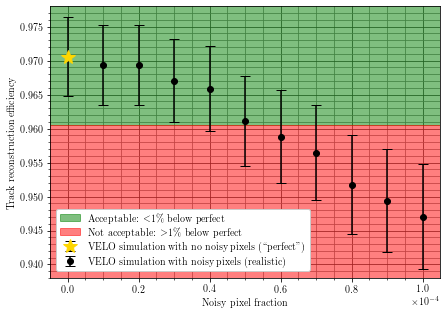

In [92]:
filename = "noisyCurveMapping"
tolerance = 0.01

fracNoisy,fracMasked,fracReconstructed,nTracksTotal,nTracksReconstructed=np.genfromtxt(filename+'.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3,4), unpack=True,dtype=None)

#calculate efficiency error
nTracksReconstructed = np.sqrt(nTracksTotal*fracReconstructed*(1-fracReconstructed))
fracReconstructedError = nTracksReconstructed / nTracksTotal

fig= plt.figure(figsize=figsize)
# plt.title("")
plt.xlabel("Noisy pixel fraction")
plt.ylabel("Track reconstruction efficiency")
plt.ylim(0.938,0.978)
plt.rc('axes', axisbelow=True)
plt.grid(which="major", c="#444")
plt.grid(which="minor", c="#888")
plt.minorticks_on()
plt.axhspan(np.max(fracReconstructed)-tolerance, 1, color="g", alpha=0.5, label="Acceptable: $<$1\% below perfect")
plt.axhspan(0, np.max(fracReconstructed)-tolerance,  color="r", alpha=0.5, label="Not acceptable: $>$1\% below perfect")
plt.errorbar(fracNoisy[0], fracReconstructed[0], yerr=fracReconstructedError[0],  c='gold', ecolor='black', label="VELO simulation with no noisy pixels (``perfect'')", marker="*", capsize=5, linestyle='', markersize='15')
plt.errorbar(fracNoisy[1:], fracReconstructed[1:], yerr=fracReconstructedError[1:],  c='black', label="VELO simulation with noisy pixels (realistic)", marker="o", capsize=5, linestyle='')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
fig.legend(loc="upper center", framealpha=1, bbox_to_anchor=(0.39,0.33))
plt.savefig("plots/"+filename+fileFormat, bbox_inches='tight')

C:\Users\Daniel\AppData\Local\Temp/ipykernel_9988/1925629187.py:12: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  sensor,fracNoisy,fracMasked,totalFracMasked,fracReconstructed,nTracksTotal,nTracksReconstructed=np.genfromtxt(filename+'.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3,4,5,6), unpack=True,dtype=None)


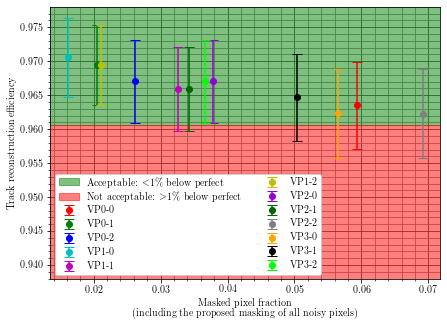

In [91]:
filename = "noisyCurveMapping"
fracNoisy,fracMasked,fracReconstructed,nTracksTotal,nTracksReconstructed=np.genfromtxt(filename+'.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3,4), unpack=True,dtype=None)
tolerance = 0.01

fig= plt.figure(figsize=figsize)
plt.axhspan(np.max(fracReconstructed)-tolerance, 1, color="g", alpha=0.5, label="Acceptable: $<$1\% below perfect")
plt.axhspan(0, np.max(fracReconstructed)-tolerance,  color="r", alpha=0.5, label="Not acceptable: $>$1\% below perfect")



filename = "maskingNoisyPixels"
sensor,fracNoisy,fracMasked,totalFracMasked,fracReconstructed,nTracksTotal,nTracksReconstructed=np.genfromtxt(filename+'.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3,4,5,6), unpack=True,dtype=None)
sensor=sensor.astype(str)

#calculate efficiency error
nTracksReconstructed = np.sqrt(nTracksTotal*fracReconstructed*(1-fracReconstructed))
fracReconstructedError = nTracksReconstructed / nTracksTotal

c=['r', 'g', 'b', 'c', 'm', 'y', 'darkviolet', 'darkgreen', 'gray', 'orange', 'black', 'lime']


# plt.title("")
plt.xlabel("Masked pixel fraction\n(including the proposed masking of all noisy pixels)")
plt.ylabel("Track reconstruction efficiency")
plt.ylim(0.938,0.978)
plt.rc('axes', axisbelow=True)
plt.grid(which="major", c="#444")
plt.grid(which="minor", c="#888")
plt.minorticks_on()
for i in range(sensor.size):
    plt.errorbar(totalFracMasked[i], fracReconstructed[i], yerr=fracReconstructedError[i],  c=c[i], label=sensor[i], marker="o", capsize=5, linestyle='')
#plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
fig.legend(loc="upper center", framealpha=1, bbox_to_anchor=(0.4,0.43), ncol=2)
plt.savefig("plots/"+filename+fileFormat, bbox_inches='tight')